## 变量分析绘图

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats, integrate 
%matplotlib inline

sns.set(color_codes=True)
np.random.seed(sum(map(ord, 'distributions')))

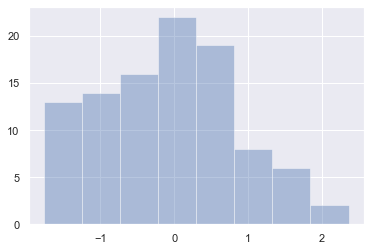

In [4]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

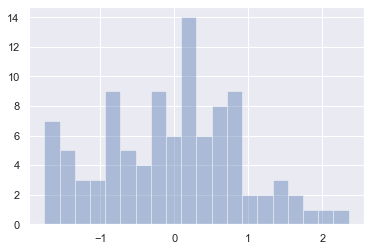

In [5]:
# 将当前数据切分成若干块
sns.distplot(x, bins=20, kde=False)

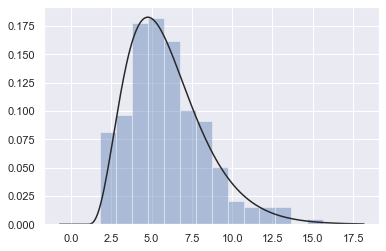

In [8]:
# 数据分布情况
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

In [11]:
# 根据均值和协方差生成数据
mean, cov = [0, 1], ([.5, 1], [1, .5])
data = np.random.multivariate_normal(mean, cov, size=200)
df = pd.DataFrame(data, columns=['x', 'y'])
df

/Users/zhaomx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


,x,y
0,0.037030,0.353348
1,-0.587436,1.498821
2,1.281903,2.701202
3,-1.684689,0.732850
4,-1.770223,1.108297
...,...,...
195,1.992314,2.505933
196,0.054875,0.757261
197,-1.233440,0.329552
198,-0.025652,-0.844519


### 观测两个变量之间的分布关系最好用散点图

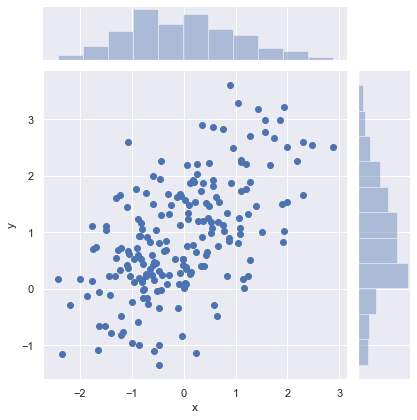

In [13]:
sns.jointplot(x='x', y='y', data=df)

/Users/zhaomx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


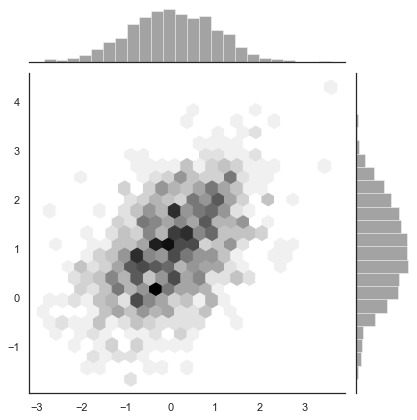

In [17]:
# 数据量较大时用下方的图能够明显反映出两个变量之间的关系，kind参数
x, y = np.random.multivariate_normal(mean, cov, size=1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex', color='k')

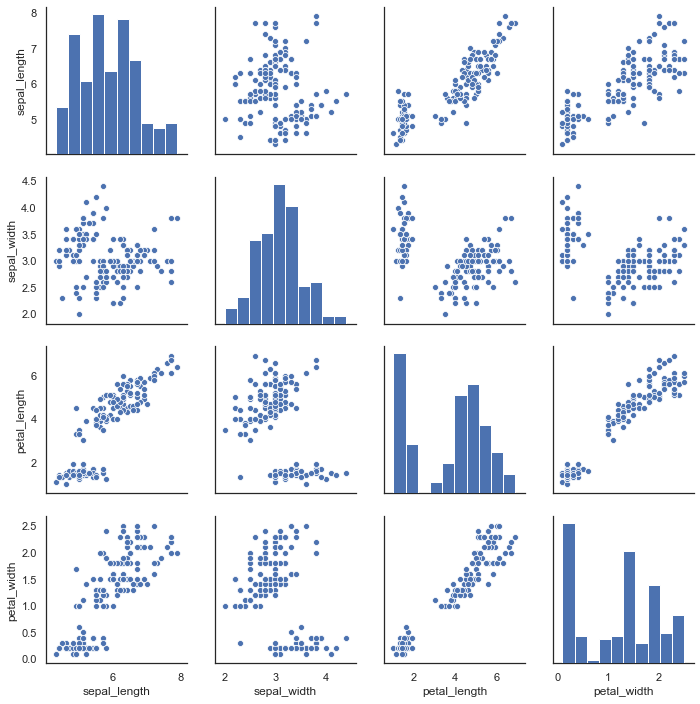

In [18]:
# 对角线代表着单变量的直观反映
# 不同变量之间关系由散点图反映
iris = sns.load_dataset('iris')
sns.pairplot(iris)

### 回归分析绘图
regplot()和lmplot()都可以，新手推荐regplot()

In [19]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, 'regression')))
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


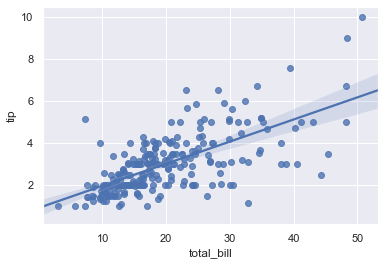

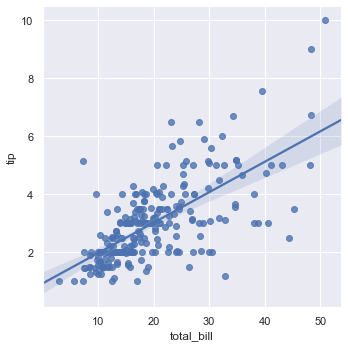

In [22]:
sns.regplot(x='total_bill', y='tip', data=tips)
sns.lmplot(x='total_bill', y='tip', data=tips)

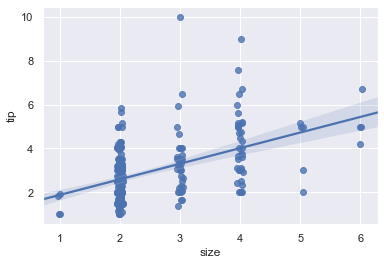

In [27]:
# 当一个变量不太满足要求是，可以加上抖动
# sns.regplot(x='size', y='tip', data=tips)
sns.regplot(x='size', y='tip', data=tips, x_jitter=.05)

In [28]:
sns.set(style='whitegrid', color_codes=True)
np.random.seed(sum(map(ord, 'categorical')))
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

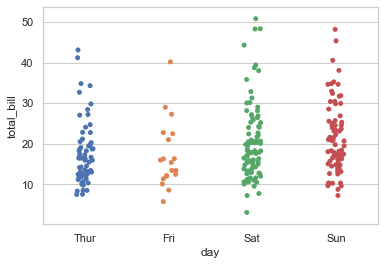

In [31]:
# 不合适的图像反例，如何解决数据在图像中过于集中的问题
sns.stripplot(x='day', y='total_bill', data=tips)
sns.stripplot(x='day', y='total_bill', data=tips，x_jitter=.05)
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)

### 盒图
容易观察得到离群点的分布情况

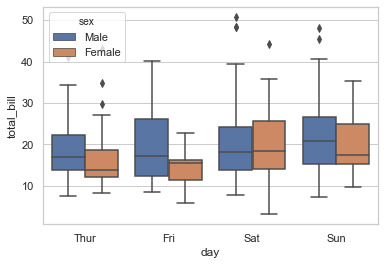

In [35]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)
# orient支持反转
sns.boxplot(x='day', y='total_bill', hue='time', data=tips， orient='h')

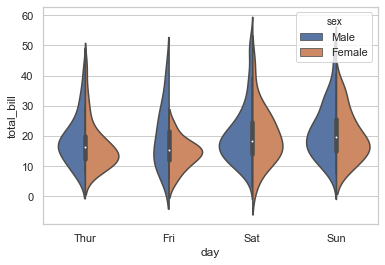

In [37]:
# split
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)

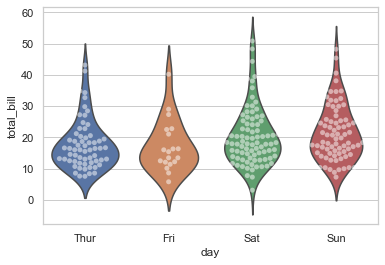

In [38]:
# 不同的图组合到一起
# alpha设定透明程度
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.swarmplot(x='day', y='total_bill', data=tips, color='w', alpha=.5)

### 显示值的集中趋势可以用条形图

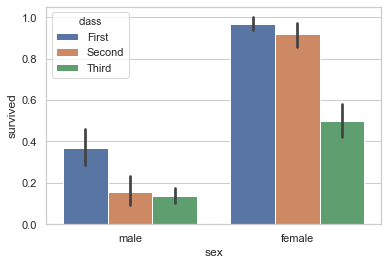

In [40]:
# class指标
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

### 点图可以更好的描述变化差异

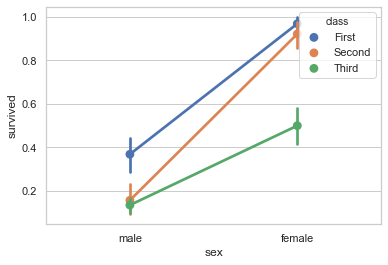

In [41]:
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

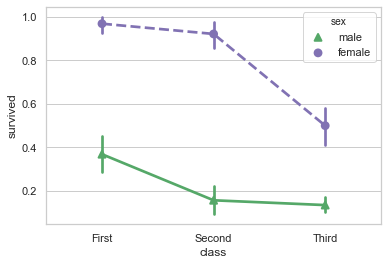

In [52]:
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
             palette={'male': 'g', 'female': 'm'},
              markers=["^", 'o'], linestyles= ['-', '--'])

### 多层面板分类图


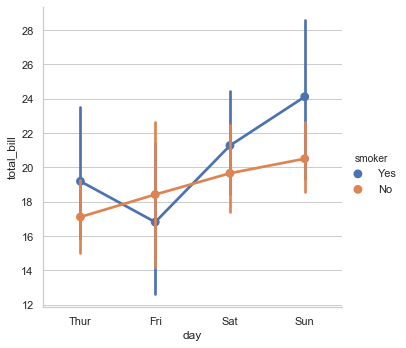

In [57]:
sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips)

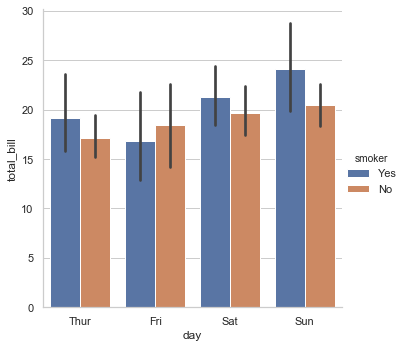

In [58]:
# 指定kind可以得到不同的图像
sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips, kind='bar')

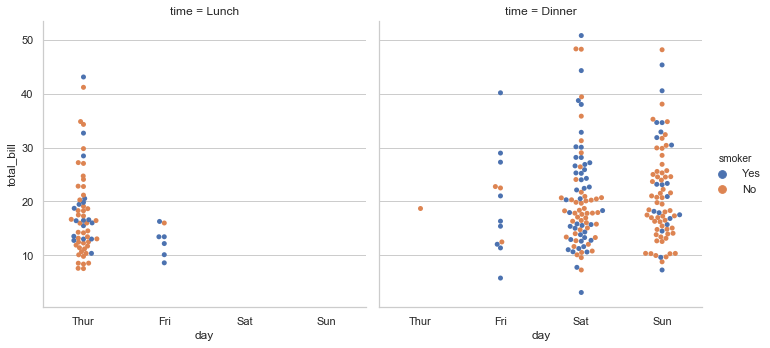

In [60]:
# 通过col制定划分的列
sns.factorplot(x='day', y='total_bill', hue='smoker', col='time', data=tips, kind='swarm')

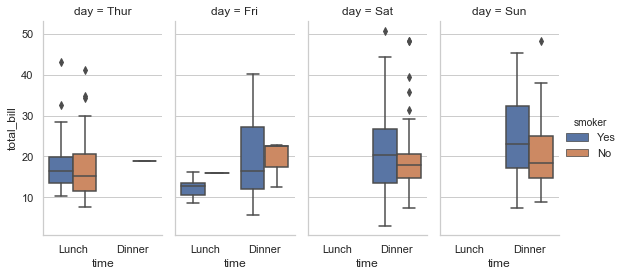

In [62]:
# aspect指定长宽比
sns.factorplot(x='time', y='total_bill', hue='smoker', col='day', data=tips, kind='box', size=4, aspect=.5)

### FacetGrid函数
将数据集中的很多子集进行展示，在使用时参数最好是pandas的数据格式

In [63]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


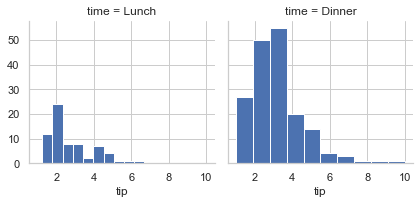

In [65]:
# 实例化
g = sns.FacetGrid(tips, col='time')
# 条形图
g.map(plt.hist, 'tip')

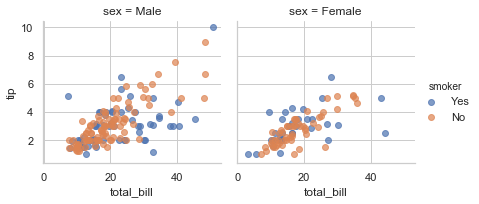

In [69]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=.7)
# 添加颜色的说明项
g.add_legend()

/Users/zhaomx/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zhaomx/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


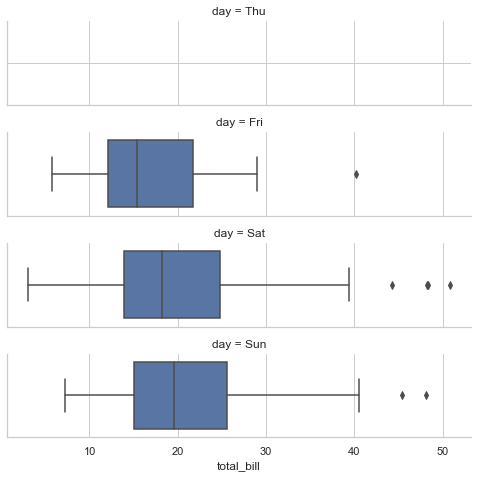

In [73]:
# 制定画图的顺序row_order
from pandas import Categorical
order_days = Categorical(['Thu', 'Fri', 'Sat', 'Sun'])
g = sns.FacetGrid(tips, row='day', row_order=order_days, size=1.7, aspect=4)
g.map(sns.boxplot, 'total_bill')

### HeatMap(热力图）

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]]


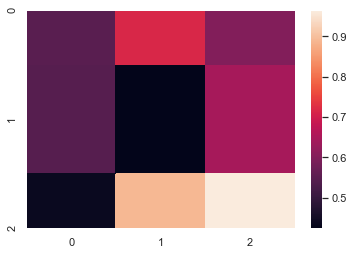

In [77]:
np.random.seed(0)
sns.set()

uniform_data = np.random.rand(3, 3)
print(uniform_data)
heatmap = sns.heatmap(uniform_data)

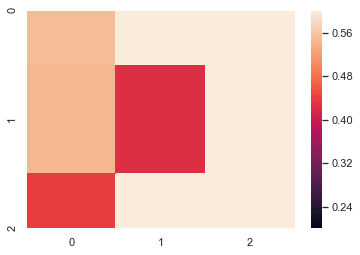

In [79]:
# 设定调色板的取值范围
ax = sns.heatmap(uniform_data, vmin=0.2, vmax=0.6)

[[ 1.26611853 -0.50587654  2.54520078]
 [ 1.08081191  0.48431215  0.57914048]
 [-0.18158257  1.41020463 -0.37447169]]


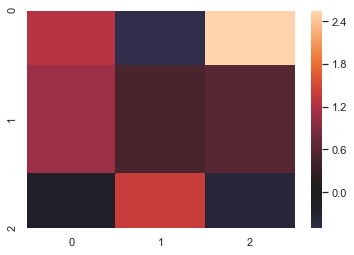

In [80]:
# 数据存在正负值
normal_data = np.random.randn(3, 3)
print(normal_data)
heatmap = sns.heatmap(normal_data, center=0)

In [84]:
flights = sns.load_dataset('flights')
flights.head()
# 将当前数据转化为年月的数据
flights = flights.pivot('month', 'year', 'passengers')
# 显示时间与乘客数量的变化关系，annot可以让数值显示到热力图中,cmap改变调色板的颜色
ax = sns.heatmap(flights, annot=True, format='d', cmap='Y1GnBu')

URLError: <urlopen error [Errno 61] Connection refused>